In [2]:
import pandas as pd
import matplotlib.pyplot as plt

TODO: Plot Percentage

In [368]:
df = pd.read_csv("results.csv")

/var/folders/fh/j2n7_k0s6tdgg1rb8_rqt0hw0000gn/T/ipykernel_4749/3257304236.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("results.csv")


In [388]:
df = pd.read_csv("results_new_correct_averaging.csv")

/var/folders/fh/j2n7_k0s6tdgg1rb8_rqt0hw0000gn/T/ipykernel_4749/3128358814.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("results_new_correct_averaging.csv")


In [370]:
len(df)

72980

In [371]:
df = pd.read_csv("results_new_correct_averaging_settozero.csv")

/var/folders/fh/j2n7_k0s6tdgg1rb8_rqt0hw0000gn/T/ipykernel_4749/4098792224.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("results_new_correct_averaging_settozero.csv")


In [389]:
df.head()

,Unnamed: 0,title,patentees,inventors,novelty,impact,importance,year,dpk,ipc,top_tfbidf_term_1,top_tfbidf_term_2,top_tfbidf_term_3,top_tfbidf_term_4,top_tfbidf_term_5,top_tfbidf_term_6,top_tfbidf_term_7,top_tfbidf_term_8,top_tfbidf_term_9,top_tfbidf_term_10
0,2661,Pincenezhållare,"Raab, Gustaf Adolf",NaN,0.002114,0.002047,0.968290,1890-02-18,44a,A44,knapphak,kläder,upphända,häålla,utgacende,norrbeöping,kro,fasthålling,trädt,ken
1,2381,Anordning vid uppfordringsverk för kontinuerli...,"Montgomery, Hampus Edvard",NaN,0.002193,0.001092,0.498106,1890-01-27,82a,F26B,klackama,uppåteacnde,fordringsverk,utebli,uppfordringsver,beg,uppfordiinga,gejdrarna,anordnino,utståead
2,2482,Anordning vid saxar för fångande av fisk,"Östling, jonas",NaN,0.002379,0.001835,0.771461,1890-03-01,45h,A01K81/0,bågare,sax,bägarn,lederna,mellanstvck,patentena,hopskarfra,gill,uppspädd,saxar
3,2397,Myllharf,"Olsen, Rasmus",NaN,0.001395,0.001056,0.756804,1890-01-02,45a,A01B25/0,plogjer,harfpin,diagona,bärasel,gro,nedmyl,fyrsidi,sådd,utsäda,såning
4,2513,Bläckreglerare vid bläckhorn,"Hallbahr, Gustaf Henning",NaN,0.002130,0.002659,1.248273,1890-02-17,70c,B43L,bläck,bläckhbor,penna,bläckhoren,doppniag,gummirimg,nedträ,önskli,hals,rörbott


In [390]:
df = df.rename(columns={"Unnamed: 0": "patent_id"})
df.head()

,patent_id,title,patentees,inventors,novelty,impact,importance,year,dpk,ipc,top_tfbidf_term_1,top_tfbidf_term_2,top_tfbidf_term_3,top_tfbidf_term_4,top_tfbidf_term_5,top_tfbidf_term_6,top_tfbidf_term_7,top_tfbidf_term_8,top_tfbidf_term_9,top_tfbidf_term_10
0,2661,Pincenezhållare,"Raab, Gustaf Adolf",NaN,0.002114,0.002047,0.968290,1890-02-18,44a,A44,knapphak,kläder,upphända,häålla,utgacende,norrbeöping,kro,fasthålling,trädt,ken
1,2381,Anordning vid uppfordringsverk för kontinuerli...,"Montgomery, Hampus Edvard",NaN,0.002193,0.001092,0.498106,1890-01-27,82a,F26B,klackama,uppåteacnde,fordringsverk,utebli,uppfordringsver,beg,uppfordiinga,gejdrarna,anordnino,utståead
2,2482,Anordning vid saxar för fångande av fisk,"Östling, jonas",NaN,0.002379,0.001835,0.771461,1890-03-01,45h,A01K81/0,bågare,sax,bägarn,lederna,mellanstvck,patentena,hopskarfra,gill,uppspädd,saxar
3,2397,Myllharf,"Olsen, Rasmus",NaN,0.001395,0.001056,0.756804,1890-01-02,45a,A01B25/0,plogjer,harfpin,diagona,bärasel,gro,nedmyl,fyrsidi,sådd,utsäda,såning
4,2513,Bläckreglerare vid bläckhorn,"Hallbahr, Gustaf Henning",NaN,0.002130,0.002659,1.248273,1890-02-17,70c,B43L,bläck,bläckhbor,penna,bläckhoren,doppniag,gummirimg,nedträ,önskli,hals,rörbott


### Patent fees paid

In [391]:
df_fees_paid = pd.read_csv("years_patent_fees_paid_1885-1914.csv", delimiter=";")
df_fees_paid

,patno,patfeespaid
0,1,1
1,10,2
2,100,3
3,1000,5
4,10000,1
...,...,...
38184,9995,1
38185,9996,4
38186,9997,2
38187,9998,1


In [392]:
df_fees_paid = df_fees_paid.rename(columns={"patno": "patent_id"})
df_fees_paid.head()

,patent_id,patfeespaid
0,1,1
1,10,2
2,100,3
3,1000,5
4,10000,1


In [393]:
# df_fees_paid = df_fees_paid.groupby("patfeespaid").count()
# df_fees_paid

In [394]:
# df_fees_paid.plot(kind='bar', legend=False)
# plt.savefig("patfeespaid_original_plot.png")

Merge the 2 dfs

In [395]:
merged = pd.merge(df, df_fees_paid, on="patent_id", how="left")
merged

,patent_id,title,patentees,inventors,novelty,impact,importance,year,dpk,ipc,...,top_tfbidf_term_2,top_tfbidf_term_3,top_tfbidf_term_4,top_tfbidf_term_5,top_tfbidf_term_6,top_tfbidf_term_7,top_tfbidf_term_8,top_tfbidf_term_9,top_tfbidf_term_10,patfeespaid
0,2661,Pincenezhållare,"Raab, Gustaf Adolf",NaN,0.002114,0.002047,0.968290,1890-02-18,44a,A44,...,kläder,upphända,häålla,utgacende,norrbeöping,kro,fasthålling,trädt,ken,5.0
1,2381,Anordning vid uppfordringsverk för kontinuerli...,"Montgomery, Hampus Edvard",NaN,0.002193,0.001092,0.498106,1890-01-27,82a,F26B,...,uppåteacnde,fordringsverk,utebli,uppfordringsver,beg,uppfordiinga,gejdrarna,anordnino,utståead,2.0
2,2482,Anordning vid saxar för fångande av fisk,"Östling, jonas",NaN,0.002379,0.001835,0.771461,1890-03-01,45h,A01K81/0,...,sax,bägarn,lederna,mellanstvck,patentena,hopskarfra,gill,uppspädd,saxar,6.0
3,2397,Myllharf,"Olsen, Rasmus",NaN,0.001395,0.001056,0.756804,1890-01-02,45a,A01B25/0,...,harfpin,diagona,bärasel,gro,nedmyl,fyrsidi,sådd,utsäda,såning,5.0
4,2513,Bläckreglerare vid bläckhorn,"Hallbahr, Gustaf Henning",NaN,0.002130,0.002659,1.248273,1890-02-17,70c,B43L,...,bläckhbor,penna,bläckhoren,doppniag,gummirimg,nedträ,önskli,hals,rörbott,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72975,83813,Anordning vid fjärrskrivapparater för automati...,Siemens & Halske AG,"Jipp, A.;Skawran, W.;Rossberg, Erhard;Simon, F...",0.001262,0.001486,1.177161,1929-12-27 00:00:00,21:a1/5,NaN,...,fjärrskrivapparat,impulskombinatio,manövreringsasel,mottagningsrela,retursignalering,strömsteg,omläce,retursigna,retur,NaN
72976,75197,"Sätt att framställa fasta, koksalthaltiga kalc...",The Mathieson Alkali Works,"MacMullin, R. B.;Taylor, Maurice C.",0.001734,0.001641,0.946250,1929-12-30 00:00:00,12:i/6,NaN,...,natriumhbydr,hypoklora,kalkmjjölk,utkrisballisera,kristalliserimg,derlut,dihbydra,kalciumhvydra,kalciumhypoklori,NaN
72977,74879,Anordning för fjärrmanövrering av rörliga före...,Takamine Corporation,"Thompson, O.",0.000898,0.000838,0.933376,1929-12-31 00:00:00,35:a/25,NaN,...,hisse,stannpla,taktor,kurvyta,operationsföljd,kontakthåilar,kvicksilverkontak,svängp,fjärrmanövrerin,NaN
72978,81100,Maskin för åstadkommande av en fast förbindels...,"Harvey, Leo M.","Harvey, Leo M.",0.001610,0.001800,1.117935,1929-12-31 00:00:00,81:c/18,NaN,...,svängp,bärram,omboce,knähävtygslik,gripklorna,backa,anslagsp,mittzo,kuggbäg,NaN


In [396]:
# sort by importance score
merged = merged.sort_values(by="importance", ascending=False)
merged.head()

,patent_id,title,patentees,inventors,novelty,impact,importance,year,dpk,ipc,...,top_tfbidf_term_2,top_tfbidf_term_3,top_tfbidf_term_4,top_tfbidf_term_5,top_tfbidf_term_6,top_tfbidf_term_7,top_tfbidf_term_8,top_tfbidf_term_9,top_tfbidf_term_10,patfeespaid
56103,54318,Skyddsmantel för undervattenskablar,Felten & Guilleaume Carlswerk AG,"Müller, Georg",0.000194,0.001197,6.183969,1922-06-17 00:00:00,21:c,NaN,...,blymantel,undervattenskabel,skyddsmantel,blymantlarna,jup,undervattensfa,carlswebk,felt,guillaume,NaN
62640,65026,Hophäktningsanordning,"Marinsky, Davis","Marinsky, Davis",0.000218,0.001050,4.823687,1925-10-06 00:00:00,3:c/3,NaN,...,häkt,slingorma,slingo,klädespla,strängarma,hophäf,styrblecek,hopklimning,fastsy,NaN
48720,48781,Anordning vid s. k. upphämtare för skruvmaskiner,Uddeholms AB,"Sundqvist, B.",0.000195,0.000795,4.080715,1919-08-04 00:00:00,49:c,NaN,...,skruvhuvade,uddeeolm,förbindningsstyc,hinderplatta,hinderplattor,upphäk,hämta,hinderpla,ellt,NaN
30447,33161,Anordning vid grammofoner,Carl Lindström AG,"Thiel, G.",0.000196,0.000794,4.047386,1910-09-28 00:00:00,42g,G10,...,ljudarim,ljudski,exeentricitet,thiel,rörmunstyc,grammmofon,frilt,paträd,carl,3.0
64258,66300,Anordning vid dammsugare,Elektriska AB Volta,"Ödman, K. R.",0.000165,0.000657,3.985955,1926-07-03 00:00:00,8:e/3,NaN,...,dammsugarehöl,dammsugarchöljet,volta,påseas,avlyfltes,luftinströmbing,avlvftande,virvl,såle,NaN


In [397]:
len(merged)

72980

In [398]:
# drop rows with Nans
merged = merged.dropna(subset=["patfeespaid"])

In [399]:
len(merged)

35493

In [400]:
# get breakthrough patents
ten_percent = int(len(merged)*0.1)
df_breakthrough = merged[:ten_percent]
df_breakthrough
# df_breakthrough.head()

,patent_id,title,patentees,inventors,novelty,impact,importance,year,dpk,ipc,...,top_tfbidf_term_2,top_tfbidf_term_3,top_tfbidf_term_4,top_tfbidf_term_5,top_tfbidf_term_6,top_tfbidf_term_7,top_tfbidf_term_8,top_tfbidf_term_9,top_tfbidf_term_10,patfeespaid
30447,33161,Anordning vid grammofoner,Carl Lindström AG,"Thiel, G.",0.000196,0.000794,4.047386,1910-09-28 00:00:00,42g,G10,...,ljudarim,ljudski,exeentricitet,thiel,rörmunstyc,grammmofon,frilt,paträd,carl,3.0
13799,16121,Slipmaskin för samtidig slipning af flera ytor,"Fontaine & Co, Boeckenheimer Naxos-Schmirgel S...","Pfaff, O.",0.000243,0.000881,3.626310,1902-06-07 00:00:00,67a,B24B,...,slipskifra,slipskifvor,bärfjad,fasongjärn,ifisk,smär,smärgelskifva,gelskifva,slipsa,1.0
32408,34816,Sköljanordning för tallrika och dylikt,"Fagerlund, Erik Artur;Börjeson, Arvid Adolf He...",NaN,0.000428,0.001529,3.575483,1911-08-01 00:00:00,34c,A47L,...,skiljoeväggarna,varusla,skovlainas,avrinnand,skovelhjuet,köm,påspol,börjeson,bsd,1.0
37350,38030,Kombinerat axial- och radialkullager,AB Svenska Kullagerfabriken,"Fjellman, Bengt Wiktor",0.000332,0.001168,3.516220,1913-11-06 00:00:00,47b,F16C,...,axiall,fjellman,radialtryc,omkretsyla,vtterrin,kulseri,kullagebfabrik,stocabolm,innerde,9.0
15223,18474,Upphängningsanordning för mjölkningsorganen vi...,"Ljungström, Fredrik",NaN,0.000637,0.002080,3.265218,1903-04-07 00:00:00,45g,A01J7/00,...,länd,buk,mjölkkär,kons,hakanordninag,bärpunk,hakom,yridande,ihaka,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,7857,Elastisk underläggsskifva af filt för jernvägs...,"Knoch, Paul",NaN,0.002303,0.002565,1.113680,1895-08-17,8k,E01B9/68,...,formale,hårdna,underläggsskifva,kromaa,indrvänka,fild,diricenom,underläggsplatt,hartslösbing,15.0
6396,11228,bad för behandling af fotografisk papper,"Schwarz, Arthur",NaN,0.000743,0.000828,1.113537,1897-05-17 00:00:00,57c,G03,...,behållama,fixerimg,pappe,skådlig,spana,öfverskädlig,förbindelser,schöberg,behaull,7.0
17872,20601,"Såll för tröskverk, sädessorterare och dylikt","Fahlin, Anders",NaN,0.000768,0.000855,1.113429,1904-11-16 00:00:00,50d,B07B,...,säll,sädessor,lufthäl,fahlin,bortblåsning,pålödning,rektangelfor,sållplit,nedätböjd,5.0
2305,5214,Säkerhetsanorndingf för linsskrapor och liknan...,"Lessing, Wilhelm",NaN,0.003594,0.004002,1.113346,1893-04-01,35a,B66B,...,säkerhetlsanordning,tanda,bristnineg,hissli,stolfa,vinkelhäfstängerna,vinkelhäfstang,uppfordringsver,fallaa,1.0


In [401]:
# drop rows with Nans
# df_breakthrough = df_breakthrough.dropna(subset=["patfeespaid"])

In [402]:
print(len(df_breakthrough))

3549


In [403]:
df_breakthrough = df_breakthrough[["patent_id", "patfeespaid"]]
df_breakthrough

,patent_id,patfeespaid
30447,33161,3.0
13799,16121,1.0
32408,34816,1.0
37350,38030,9.0
15223,18474,8.0
...,...,...
4389,7857,15.0
6396,11228,7.0
17872,20601,5.0
2305,5214,1.0


In [404]:
df_breakthrough = df_breakthrough.groupby("patfeespaid").count()
df_breakthrough

,patent_id
patfeespaid,
1.0,989
2.0,209
3.0,362
4.0,304
5.0,256
6.0,177
7.0,145
8.0,132
9.0,126


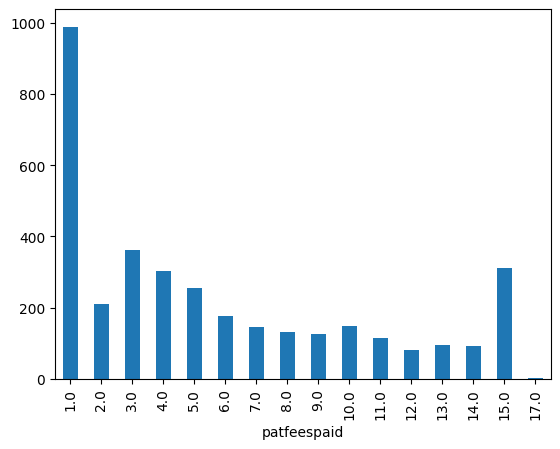

In [405]:
df_breakthrough.plot(kind='bar', legend=False)
plt.savefig("results_patfeespaid.png")

# Get top terms for breakthrough patents

In [57]:
df = pd.read_csv("results.csv")
df = df.rename(columns={"Unnamed: 0": "patent_id"})

/var/folders/fh/j2n7_k0s6tdgg1rb8_rqt0hw0000gn/T/ipykernel_6587/1657911337.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("results.csv")


In [58]:
df['year'] = pd.to_datetime(df['year'], format="mixed")
df['year'] = df['year'].dt.year

In [59]:
df.head()

,patent_id,title,patentees,inventors,novelty,impact,importance,year,dpk,ipc,top_tfbidf_term_1,top_tfbidf_term_2,top_tfbidf_term_3,top_tfbidf_term_4,top_tfbidf_term_5,top_tfbidf_term_6,top_tfbidf_term_7,top_tfbidf_term_8,top_tfbidf_term_9,top_tfbidf_term_10
0,2661,Pincenezhållare,"Raab, Gustaf Adolf",NaN,0.068966,0.070316,1.019572,1890,44a,A44,raab,fehbrnari,häålla,utgacende,norrbeöping,kro,trädt,häkta,hällag,-
1,2513,Bläckreglerare vid bläckhorn,"Hallbahr, Gustaf Henning",NaN,0.286754,0.306251,1.067991,1890,70c,B43L,bläck,bläckhbor,bläckhoren,doppniag,nedträ,önskli,rörbott,djupgaende,rituving,nedsal
2,2381,Anordning vid uppfordringsverk för kontinuerli...,"Montgomery, Hampus Edvard",NaN,0.109925,0.107681,0.979583,1890,82a,F26B,fordringsanordning,fordringsverk,utebli,montgomery,uppfordringsver,beg,uppfordiinga,gejdrarna,anordnino,utståead
3,2482,Anordning vid saxar för fångande av fisk,"Östling, jonas",NaN,0.110736,0.100785,0.910140,1890,45h,A01K81/0,bågare,bägarn,lederna,patentena,uppgillring,hopskarfra,gill,gillerstäng,uppspädd,båga
4,2766,Anordning vid fyrpannor,"Deydon, Alexandre",NaN,0.090924,0.082095,0.902895,1890,36a,F24,mantla,öfvertäc,tiäc,itii,iiit,ångutvecklin,lufttillopns,rumslaft,uppvärmningsvta,pläga


In [64]:
df.sort_values(by="novelty", ascending=False)[:100]

,patent_id,title,patentees,inventors,novelty,impact,importance,year,dpk,ipc,top_tfbidf_term_1,top_tfbidf_term_2,top_tfbidf_term_3,top_tfbidf_term_4,top_tfbidf_term_5,top_tfbidf_term_6,top_tfbidf_term_7,top_tfbidf_term_8,top_tfbidf_term_9,top_tfbidf_term_10
40430,42065,Apparat för förvarande och avlämnande av socke...,"Nyvander, Fredrik","Dahlström, Carl Otto Sven",0.875727,0.132377,0.151162,1915,34: f,NaN,sockerbi,nedåtböjning,låsimrättning,hygicnhisk,metallblack,bit,frimre,tådan,utsläppningsöppning,uppåtböining
13798,16102,Anordningar vid album för skrädderimönster o. d.,"Lindholm, Johan Olof Nathanael;Johansson, Karl...",NaN,0.849411,0.311418,0.366628,1902,11e,B42F5/00,album,pärmark,bladkant,lindholm,fjär,södertalje,oem,occ,afi,afsee
24116,28427,Sädesharpa,"Elfving, Anders",NaN,0.848273,0.484261,0.570879,1907,45e,A01F12/4,harpan,tning,istreringsverk,tröskv,spr,blt,utföringsterm,sudan,utl,harpa
13022,14436,Anordning vid spottlådor,"Anderson, Carl Gunnar",NaN,0.839252,0.794464,0.946634,1901,34f,A47G,spottlada,uppfälilbar,igenfyllning,igenfalland,ledtap,spott,uppitfran,smäll,boktryeckeri,avg
5333,8053,Anordning för att fästa kravatter vid skjortor...,"Achler, Jan;Eckent, Jan;Novák, Josef",NaN,0.830164,0.262578,0.316296,1896,3b,A41D,kravabll,skjortor,skjort,uppfianiag,nålliknande,kylsa,lög,eckara,skjor,sidofli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65487,67085,Efter olika skodon inställbart skidbindningstå...,L’Abée Lund AS,"L’Abée Lund, Johan Henrik",0.494870,0.470036,0.949818,1927,77:b/15,NaN,tåjärm,lab,lund,fästarmarna,tåjär,skidband,utklim,plattjären,fastskrufbar,tårcem
4903,9309,Anordning vid bakladdningskanoner,"Vickers, Douglas",NaN,0.493736,0.389522,0.788929,1896,72c,F41,kammarskraf,kammarstrycke,glidstäing,bakladdningikanon,kammarstvck,kano,skår,vicker,glidstången,fastli
8624,10864,Dragstropp med selpinne,Jakobson & Eriksson,"Eklund, P. A.",0.492834,0.540631,1.096984,1899,56b,B68,selpien,dragstrop,ulan,eklund,skalma,jakobi,lösskru,umeå,skill,svaria
21819,23139,Anordning vid stäthärdar,Maschinenbau Anstalt Humboldt,"Bartoch, W. J.",0.491892,0.224716,0.456841,1906,1a,B,stötstang,stötamordning,tillbakagang,humboldt,maschinenbauanstal,stötvel,arhbin,reffia,raktiärisera,enkelverka


In [52]:
df = df.groupby('year').apply(lambda x: x.nsmallest(10, 'novelty')).reset_index(drop=True)# Display the resulting DataFrame
df

,patent_id,title,patentees,inventors,novelty,impact,importance,year,dpk,ipc,top_tfbidf_term_1,top_tfbidf_term_2,top_tfbidf_term_3,top_tfbidf_term_4,top_tfbidf_term_5,top_tfbidf_term_6,top_tfbidf_term_7,top_tfbidf_term_8,top_tfbidf_term_9,top_tfbidf_term_10
0,2872,Anordningar vid elektriska loggar,"Granville, William Puddicombe",NaN,0.000000,0.295482,0.000000,1890,42o,G01P,logg,skrnof,logga,sjövap,sjö,sjövatten,induktionsrall,bogscra,ombord,nakna
1,2648,Spottlåda,"Hertzberg, Rafaël",NaN,0.000000,0.394411,0.000000,1890,34f,A47G,spottlada,spott,simma,behuall,skölea,hann,repad,kelformig,nrp,helsingfor
2,3264,"Räknemaskin, benämd arithmomoter","Adhner, Willgodt",NaN,0.000000,0.330166,0.000000,1890,42m,G06,registreringshbjul,ringshjul,bredvidligga,minn,oda,kuggad,minnesöfverföring,räknehjulasel,eesk,rop
3,3113,Svängande trasnportränna för pulverformiga ell...,"Kreiss, Eugen",NaN,0.052742,0.077698,1.473181,1890,81e,B65,transportrigtning,transportrig,transportriänna,diveregerande,oläoenhet,rännah,pilare,tune,sicksackformen,slun
4,2736,Sätt och anordning för undervattenssprängningar,"Puskas, Theodor",NaN,0.054017,0.081732,1.513087,1890,84a,E02B3/02,sprängpatro,sprängniag,hölster,tänande,hölsta,trada,halfsf,ofvanfran,snörena,söndersprang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,79132,Veksmörjningsanordning för kombinerad sugveke-...,"Kreidel, Hans","Kreidel, Hans",0.062538,0.097230,1.554728,1929,47:e/6,NaN,smörjmedelsbehållar,sugvek,smörjsläll,inpumning,medelsbehållar,slangförbindels,förbindelseslad,förtjocekning,nippeln,nippl
396,72999,Anordning för att i och för paketering uppdela...,"Universelle Cigarettenmaschinenfabrik, J. C. M...","Jähne, E. H.",0.062735,0.086052,1.371682,1929,78:a/10,NaN,förskjutningsanordnin,täckta,försa,skjutningsanordning,tändsticksma,styrningsstvck,styrningsstlycke,inriget,tändsticekorna,portban
397,71494,Anordning vid länkmattor,"Ringström, Fritz Ferdinand","Ringström, Fritz Ferdinand",0.063254,0.110500,1.746914,1929,34:f/24,NaN,ytterlamel,omvicka,mellei,oelastisk,änddelama,genomförimg,mattor,lamelleina,slitstark,stela
398,69561,Behållare för upptagande av tändsatsmassan vid...,"Kessler, Johann;Fischer, Georg","Kessler, Johann",0.063298,0.131593,2.078934,1929,78:a/3,NaN,satsmass,satsnine,omkretsriktni,kessel,skumbidning,tändsticekorna,rengöringsarbe,tändstieksmaskin,tändsticksmaski,upptrvyck


Yes, exactly what you mean, it would be interesting to look at what words get the high tf*bidf scores.
 
If possible, can you give top 5 words (with highest tf*bidf score) of top 10 documents for each year?

In [53]:
# 1) get top 10 documents by novelty/impact/importance per year
# 2) get top 5 

In [54]:
df = df[["patent_id", "title", "patentees", "inventors", "novelty", "impact", "importance", "year", "top_tfbidf_term_1", "top_tfbidf_term_2", "top_tfbidf_term_3", "top_tfbidf_term_4", "top_tfbidf_term_5"]]
df

,patent_id,title,patentees,inventors,novelty,impact,importance,year,top_tfbidf_term_1,top_tfbidf_term_2,top_tfbidf_term_3,top_tfbidf_term_4,top_tfbidf_term_5
0,2872,Anordningar vid elektriska loggar,"Granville, William Puddicombe",NaN,0.000000,0.295482,0.000000,1890,logg,skrnof,logga,sjövap,sjö
1,2648,Spottlåda,"Hertzberg, Rafaël",NaN,0.000000,0.394411,0.000000,1890,spottlada,spott,simma,behuall,skölea
2,3264,"Räknemaskin, benämd arithmomoter","Adhner, Willgodt",NaN,0.000000,0.330166,0.000000,1890,registreringshbjul,ringshjul,bredvidligga,minn,oda
3,3113,Svängande trasnportränna för pulverformiga ell...,"Kreiss, Eugen",NaN,0.052742,0.077698,1.473181,1890,transportrigtning,transportrig,transportriänna,diveregerande,oläoenhet
4,2736,Sätt och anordning för undervattenssprängningar,"Puskas, Theodor",NaN,0.054017,0.081732,1.513087,1890,sprängpatro,sprängniag,hölster,tänande,hölsta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,79132,Veksmörjningsanordning för kombinerad sugveke-...,"Kreidel, Hans","Kreidel, Hans",0.062538,0.097230,1.554728,1929,smörjmedelsbehållar,sugvek,smörjsläll,inpumning,medelsbehållar
396,72999,Anordning för att i och för paketering uppdela...,"Universelle Cigarettenmaschinenfabrik, J. C. M...","Jähne, E. H.",0.062735,0.086052,1.371682,1929,förskjutningsanordnin,täckta,försa,skjutningsanordning,tändsticksma
397,71494,Anordning vid länkmattor,"Ringström, Fritz Ferdinand","Ringström, Fritz Ferdinand",0.063254,0.110500,1.746914,1929,ytterlamel,omvicka,mellei,oelastisk,änddelama
398,69561,Behållare för upptagande av tändsatsmassan vid...,"Kessler, Johann;Fischer, Georg","Kessler, Johann",0.063298,0.131593,2.078934,1929,satsmass,satsnine,omkretsriktni,kessel,skumbidning


In [55]:
df.to_excel("results_most_novel.xlsx", index=False)